In [1]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders,show_gas,find_local_min
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

path = r'./data_1/艾兴义_5723.jpg'
name = path.split('/')[-1].split('.')[0].split('_')[0]
%timeit ha_SignCompare(path, name)

355 ms ± 6.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


100 327
86 234


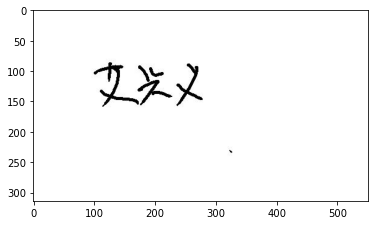

In [6]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders,show_gas,find_local_min
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
%matplotlib inline
path = r'./data_1/艾兴义_5723.jpg'
name = path.split('/')[-1].split('.')[0].split('_')[0]
img = Image.open(path).convert('RGB')
limg = img.convert('L').point(lambda p: 0 if p > 200 else 1, '1')
img_data = np.array(limg, dtype=np.int32)
dire_sum_0 = img_data.sum(axis=0)
dire_sum_1 = img_data.sum(axis=1)
no0_dir0 = np.where(dire_sum_0>0)[0]
print(no0_dir0[0],no0_dir0[-1])
no0_dir0 = np.where(dire_sum_1>0)[0]
print(no0_dir0[0],no0_dir0[-1])
plt.imshow(img)
plt.show()

In [7]:
from ha_SignCompare import ha_SignCompare
import glob
%matplotlib inline
count, pos_count = 0, 0
dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*.jpg'))
# path = r'./data_1/艾兴义_5723.jpg'

for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    code, message, char_count, char_list = ha_SignCompare(path, name)
    temp_count = 0
    for i, n in enumerate(name):
        count += 1
        if n in char_list[i]:
            temp_count += 1
    pos_count += temp_count
    if temp_count != len(name):
        print(name, char_list)
print(count, pos_count)

杜成利 [['杜', '枉', '社', '杠', '朴', '枯', '种', '柱', '枰', '柚', '柑', '枢', '栝', '枨', '桂', '仲', '灶', '林', '杖', '杪', '杆', '忡', '杈', '桫', '树', '枇', '壮', '在', '衽', '桩'], ['戍', '龙', '态', '忒', '戒', '殆', '减', '咸', '术', '右', '戚', '碱', '汆', '夼', '盛', '柃', '吞', '尤', '瓜', '穴', '划', '戎', '布', '戌', '祓', '杖', '杰', '砧', '太', '黏'], ['利', '剩', '刹', '秒', '科', '种', '和', '邾', '俐', '剁', '称', '刺', '秘', '秋', '制', '私', '积', '稳', '莉', '秆', '剌', '邪', '彩', '刊', '刮', '邸', '矧', '衬', '移', '邢']]
郑志刚 [['瓣', '糨', '褙', '糟', '糈', '耀', '糯', '瘸', '獭', '镪', '粥', '耩', '锵', '耱', '襁', '耥', '艚', '虢', '黼', '糖', '禧', '辩', '潲', '髓', '颡', '镳', '耨', '潴', '瘾', '籍'], ['汆', '必', '沁', '氽', '河', '心', '邻', '伞', '丹', '糸', '戍', '俞', '何', '痧', '泌', '式', '宓', '尔', '汴', '今', '步', '爪', '汗', '划', '刘', '齐', '郐', '余', '父', '汊'], ['乳', '氵', '沙', '汔', '泠', '过', '创', '刹', '贰', '洽', '沁', '就', '武', '没', '刘', '辽', '试', '亨', '孚', '汆', '烈', '洛', '忒', '然', '刂', '学', '沿', '汽', '注', '邻']]
84 80


In [4]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders, show_gas, find_local_min, find_connect
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
import time
from scipy.ndimage import gaussian_filter1d
from prediction import image_prediction
%matplotlib inline
# 郑志刚_1592 高海丰_1381
dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*.jpg'))
# jpg_path_list = ['./data_1/高海丰_1381.jpg', './data_1/郑志刚_1592.jpg']
# path = r'./data_1/艾兴义_5723.jpg'
for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    img = Image.open(path).convert('RGB')
    direction = 1
    s_t = time.time()
    areas = find_connect(img, direction = direction, overlap = 0.85)
    if len(areas) == 3:
        borders = find_best_borders_connect(img, name, direction = direction, net_type = 'S', net_num = 297)
    # print(len(areas))
        show_borders(img, borders)
        count = 0
        for i, border in enumerate(borders):
            pred_char, conf, toplist, label_confs = image_prediction(img.crop(border), topk = 30, labels = list(name))
            if name[i] in toplist:
                count += 1
    e_t = time.time()
    print(count, str(e_t - s_t))
    #     print(toplist)
    #     print(label_confs)
    # borders = find_best_borders_gas(img, name, direction = direction, net_type = 'S', gas_std = 8, net_num = 297)
    # show_borders(img, borders)
    # borders = find_best_borders_gas(img, name, direction = direction, net_type = 'G', net_num = 825)
    # show_borders(img, borders)
    # start_time = time.time()
    # code, message, char_count, char_list = ha_SignCompare(path, name)
    # end_time = time.time()
    # print(str(end_time - start_time))
    # print(char_list)
    # %timeit ha_SignCompare(path, name)

    # limg = img.convert('L').point(lambda p: 0 if p > 200 else 1, '1')
    # img_data = np.array(limg, dtype=np.int32)
    # verdire_sum = img_data.sum(axis=1-direction)
    # gas8 = gaussian_filter1d(verdire_sum, 7)
    # local_min = find_local_min(gas8)
    # show_gas(img, direction = direction, gas_std = 7)
    # print(local_min)


0 0.00691986083984375


TypeError: find_best_borders_connect() got an unexpected keyword argument 'net_num'

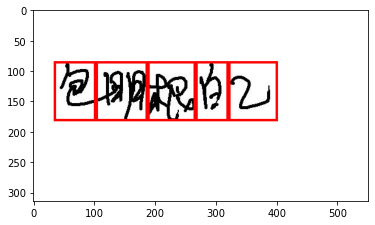

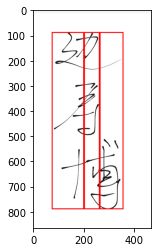

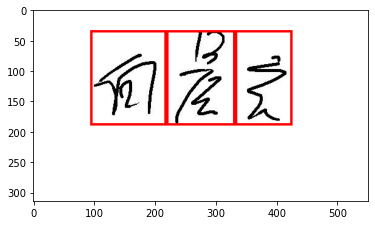

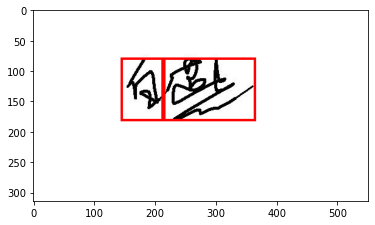

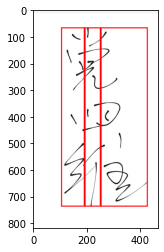

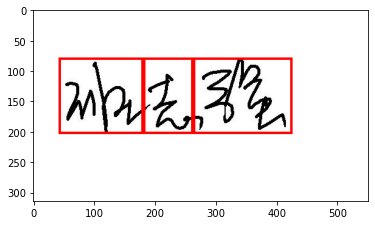

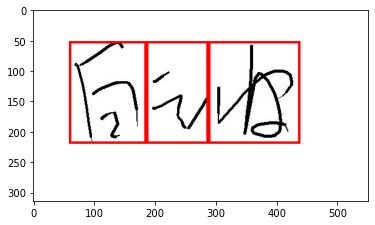

KeyboardInterrupt: 

In [2]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders,show_gas,find_local_min
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
import time
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*.jpg'))
# path = r'./data_1/艾兴义_5723.jpg'
for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    img = Image.open(path).convert('RGB')
    direction = 1
    borders = find_best_borders_gas(img, name, direction = direction)
    show_borders(img, borders)
    # borders = find_best_borders_gas(img, name, direction = direction, net_type = 'G', net_num = 825)
    # show_borders(img, borders)


In [2]:
from ha_SignCompare import ha_SignCompare
import glob
import time

dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*.jpg'))
for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    start_time = time.time()
    code, message, char_count, char_list = ha_SignCompare(path, name)
    end_time = time.time()
    print(str(end_time - start_time))

1.1408209800720215
0.9147655963897705
1.0825202465057373
0.7451493740081787
1.082850694656372
1.194319725036621
0.7459824085235596
0.8585629463195801
1.2513611316680908
0.9137935638427734
0.7986454963684082
0.7434737682342529
1.4211509227752686
1.1389172077178955
0.7459728717803955
1.137237548828125
1.2518858909606934
0.798839807510376
0.7429368495941162
0.7443950176239014
0.35373997688293457
0.3533189296722412
0.6965124607086182
0.8822159767150879
1.1961185932159424
0.7483463287353516
1.255600929260254
1.7057111263275146


In [9]:
from prediction import image_prediction
from PIL import Image
%matplotlib inline

path = r'./test00001.png'
img = Image.open(path)
%timeit image_prediction(img, net_num = 825, topk = 30, labels = None, net_type = 'G')
# %timeit image_prediction(img, net_num = 297, topk = 30, labels = None, net_type = 'S')
%timeit image_prediction(img, net_num = 297, topk = 30, labels = None, net_type = 'S')

117 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
56.2 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
